# Project: Analysis of Germany indicators over time

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Our analysis focused on the investigating the data about Germany. For that we choose the Gapminder datasets. In this project we analyse the influence of the different factors on the GDP per capita. Track GDP per capita and other indicators over time, compare some of them ans check the correlation between indicators and GDP per capita. 
Our chosen indicators, besides GDP per capita, are population, life expectancy and schooling years of men and women.

Gapminder datasets do not always consistent with the time duration of datasets. Therefore we present different time durations, dependent on avaliable information.

We focus on the following research questions: time series analysis of indicators, correlation between GDP per capita and indicators, in addition, comparison of schooling years of men and women. 


In [84]:
#import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D #for plottin the 3 dimensional graphs

% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

This is the most complicated step in our analysis. Since Gapminder datasets collected from different sourses, there is no consistency in time or structure between them. Therefore we need to have individual approach to each dataset. 


### General Properties

In [85]:
# Load the data
GDP_per_capita = pd.read_csv('GDP_per_capita.csv', sep=";")
population = pd.read_csv('population.csv', sep = ";")
school_men = pd.read_csv('school_men.csv', sep = ";")
school_women = pd.read_csv('school_women.csv', sep = ";")
life_expectancy_years = pd.read_csv('life_expectancy_years.csv', sep = ";")



### Data Cleaning

We focus our analysis on the Germany case, therefore we need to make a table with all variables in one and only for Germany. 

We create tables with the values relevant only for Germany for each variable.

In [86]:
GDP_per_capita.head()
print(type(GDP_per_capita)) #type  - Data frame

#Create DataFrame with values for Germany
GDP_per_capita.shape
G_GDP_per_capita = GDP_per_capita[GDP_per_capita["geo.name"] == "Germany"]
#G_GDP_per_capita

#Same pocedure for population
G_population = population[population["Total population"] == "Germany"]
#G_population

#Same pocedure with schooling years for men and women
school_men.head()
G_school_men = school_men[school_men["Row Labels"] == "Germany"]
#G_school_men 

school_women.head()
G_school_women = school_women[school_women["Row Labels"] == "Germany"]
#G_school_women 

#Same pocedure for life expectancy
G_life_expectancy = life_expectancy_years[life_expectancy_years["Life expectancy"] == "Germany"]
#G_life_expectancy


<class 'pandas.core.frame.DataFrame'>


After we need to create one table with all variables. However, our datasets have horisontal representation, therefore we need to transpose them.

In [87]:
#we need to transpose the all datasets
G_GDP_per_capita = G_GDP_per_capita.T
G_population = G_population.T
G_school_men = G_school_men.T
G_school_women = G_school_women.T
G_life_expectancy = G_life_expectancy.T

Now we have variable as column, years as rownames.

Then we continue with data cleaning. Datasets have some unnesessary columns, therefore we need to remove them. In addition we make year as a variable (before 'year' was the row name) in order to merge datasets with one unique variable.

In [88]:
#removing unnessessary columns, change the column name, making the year as a variable
G_GDP_per_capita = G_GDP_per_capita.drop(G_GDP_per_capita.index[0:4])
#time range 1800 - 2040 (predicted)
G_GDP_per_capita.columns = ['gdp_per_cap']

G_GDP_per_capita.index.name = 'year'
G_GDP_per_capita.reset_index(inplace=True)

In [89]:
G_population = G_population.drop(G_population.index[0])
#time range 1900-2015
G_population.columns = ['pop']

G_population.index.name = 'year'
G_population.reset_index(inplace=True)

#remove unnesessary bottom column:
G_population = G_population[:-10]

In [90]:
G_school_men = G_school_men.drop(G_school_men.index[0])
#time range 1970-2009
G_school_men.columns = ['school_men']

G_school_men.index.name = 'year'
G_school_men.reset_index(inplace=True)

In [91]:
G_school_women = G_school_women.drop(G_school_women.index[0])
#time range 1970-2009
G_school_women.columns = ['school_women']

G_school_women.index.name = 'year'
G_school_women.reset_index(inplace=True)

In [92]:
G_life_expectancy = G_life_expectancy.drop(G_life_expectancy.index[0])
#time range 1800-2016
G_life_expectancy.columns = ['life_exp']

G_life_expectancy.index.name = 'year'
G_life_expectancy.reset_index(inplace=True)

In [93]:
#merging all datasets
G_data = pd.merge(G_GDP_per_capita, G_population, how = 'outer')
G_data = pd.merge(G_data, G_school_men, how = 'outer')
G_data = pd.merge(G_data, G_school_women, how = 'outer')
G_data = pd.merge(G_data, G_life_expectancy, how = 'outer')

G_data = G_data[:216] #we remove all predicted variables to focus the analysis on current situation until 2015 year
#G_data

G_data is our final dataset with all variables. We decided to focus on the real variables, and remove predicted ones. Therefore we removed information starting from 2016 because for 2015 we have more information. 

Now we move to the data exploration. 

In [94]:
#G_data.describe()
G_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 6 columns):
year            216 non-null object
gdp_per_cap     216 non-null object
pop             81 non-null object
school_men      40 non-null object
school_women    40 non-null object
life_exp        216 non-null object
dtypes: object(6)
memory usage: 11.8+ KB


As we can see all variables have 'object' type. In order to make analysis (plot regressions and track over time) we need to convert our variables into numeric type. 

Where it is required, procedure also followed with replacing the decimals, for the correct calculations.

In [95]:
#convert all columns into numeric
G_data['gdp_per_cap'] = G_data['gdp_per_cap'].apply(pd.to_numeric,  errors='coerce')
G_data['year'] = G_data['year'].apply(pd.to_numeric)

In [96]:
G_data['pop'] = G_data['pop'].str.replace(r'.', '')
G_data['pop'] = G_data['pop'].apply(pd.to_numeric,  errors='coerce')
#G_data['pop']

In [97]:
G_data['school_men'] = G_data['school_men'].str.replace(r',', '.')
G_data['school_men'] = G_data['school_men'].apply(pd.to_numeric,  errors='coerce')
#G_data['school_men'].describe()

In [98]:
G_data['school_women'] = G_data['school_women'].str.replace(r',', '.')
G_data['school_women'] = G_data['school_women'].apply(pd.to_numeric,  errors='coerce')
#G_data['school_women'].describe()

In [99]:
G_data['life_exp'] = G_data['life_exp'].str.replace(r',', '.')
G_data['life_exp'] = G_data['life_exp'].apply(pd.to_numeric,  errors='coerce')
#G_data['life_exp'].describe()

In [100]:
G_data.head()

,year,gdp_per_cap,pop,school_men,school_women,life_exp
0,1800,1639.0,22886919.0,NaN,NaN,38.37
1,1801,1650.0,NaN,NaN,NaN,38.37
2,1802,1662.0,NaN,NaN,NaN,38.37
3,1803,1673.0,NaN,NaN,NaN,38.37
4,1804,1685.0,NaN,NaN,NaN,38.37


Now we can move to the data exploration and answer our questions.

<a id='eda'></a>
## Exploratory Data Analysis


### 1. Development of population and GDP per capita over the time

Firstly, we will fulfill the missing values for the population based on the linear regression approach. In this case it is easier, because in the data we have information each 10 years. Therefore predicted values will more or less reflect the reality.

In [101]:
#since there is a lot of missing values we will fulfill the missing values with linear method:
G_data['pop'] = G_data['pop'].interpolate()
#G_data['pop']

We want to track GDP per capita over time. With visual representation we can see the GDP per capita growing over years with drop in 1940s. The drop could be explained that Germany did participate in the second world war. Same drop in 1910s also mainly explained by the martial law in the country.

Text(0.5,1,'GDP per capita over years')

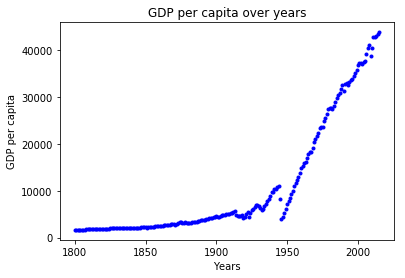

In [102]:
plt.plot('year', 'gdp_per_cap', 'b.', data=G_data)
plt.xlabel("Years")
plt.ylabel("GDP per capita")
plt.title('GDP per capita over years')

Then we move to the investigation of the population. The value also growth over time, with small fluctuations after 1900s. 

Text(0.5,1,'Population over years')

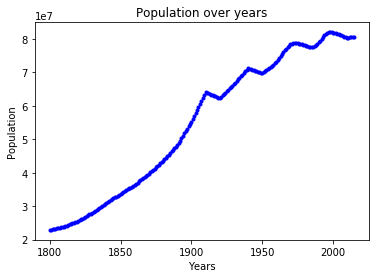

In [103]:
plt.plot('year', 'pop', 'b.', data=G_data)
plt.xlabel("Years")
plt.ylabel("Population")
plt.title('Population over years')

In order to plot dependence of both variables and track it over time we need the 3D dimensional graph.

Text(0.5,0.92,'Dependence of GDP per capita on Population over years')

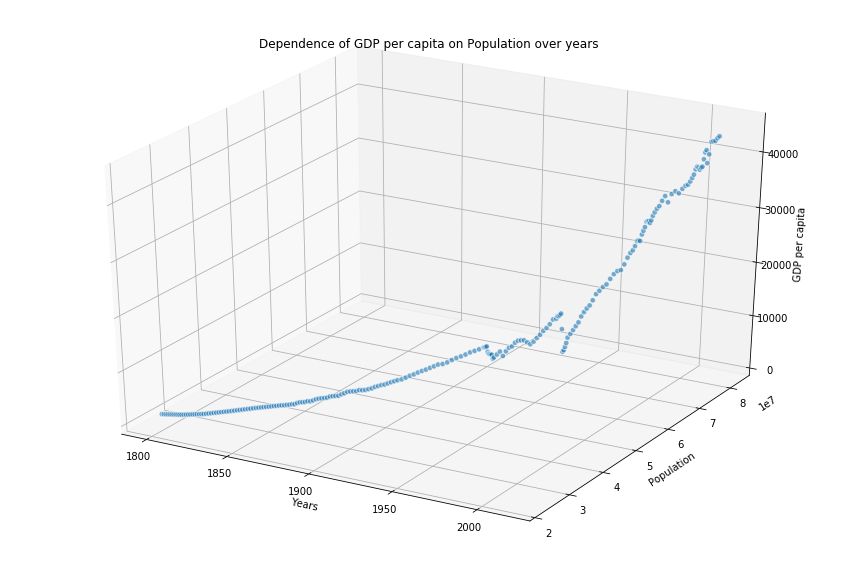

In [104]:
# visualisation of 3D   
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = G_data['year']
ys = G_data['pop']
zs = G_data['gdp_per_cap']
ax.scatter(xs, ys, zs, s=30, alpha=0.6, edgecolors='w')

ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.set_zlabel('GDP per capita')

plt.title('Dependence of GDP per capita on Population over years')



We decided to plot 3d because of time dimension. 
Related the population and GDP per capita we observe continous growth. In the year 1940 we can see the drop, that connected with the second world war.
 
Graph presents the information until 2015 with continious growth in both variables. Starting from 1940 growth is much faster, compare to previous period.
 

### 2. Schooling years on GDP per capita

The next variable that we investigate is the schooling years of men and women. Firstly we will compare them.

Firstly, we compare mean of schooling years. As we can see from statistics, men have study year more than year above than women. If we look at maximum value which represent the year 2010, difference decreased to 0.4 year. This presented also in the following graph.

Text(0.5,1,'Schooling years trend')

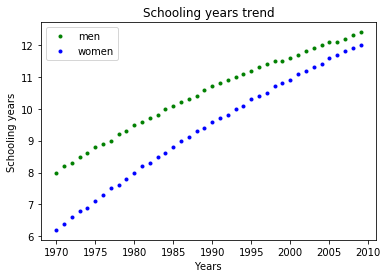

In [106]:
plt.plot('year', 'school_men', 'b.', color='green', data=G_data, label = 'men')
plt.plot('year', 'school_women', 'b.', data=G_data, label = 'women')
plt.xlabel("Years")
plt.ylabel("Schooling years")
plt.legend()


plt.title('Schooling years trend')

The difference between schooling years is decreasing over time.

Now we move to the representation of development of combination of schooling years and GDP per capita. 

Text(0.5,0.92,'Dependence of GDP per capita on Schooling years trend')

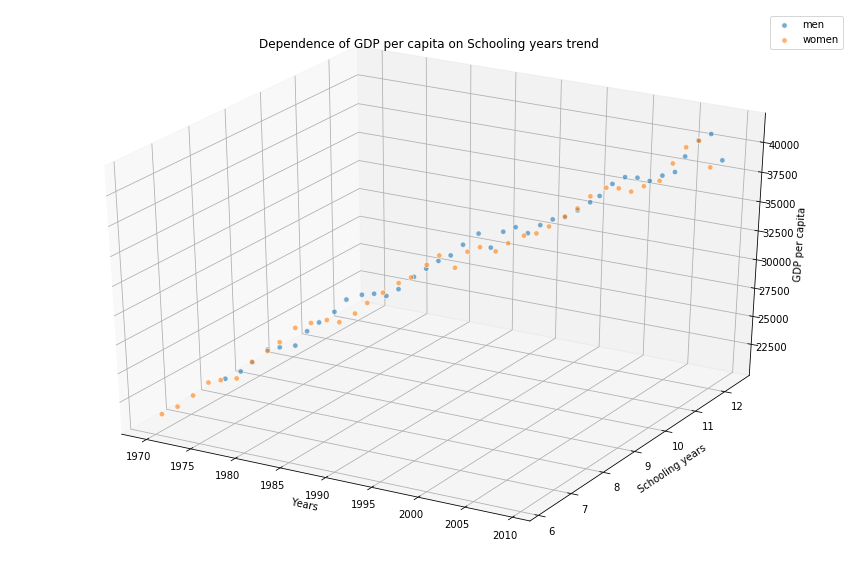

In [107]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = G_data['year']
ys = G_data['school_men']
ys2 = G_data['school_women']
zs = G_data['gdp_per_cap']
ax.scatter(xs, ys, zs, s=30, alpha=0.6, edgecolors='w', label = "men")
ax.scatter(xs, ys2, zs, s=30, alpha=0.6, edgecolors='w', label = "women")


ax.set_xlabel('Years')
ax.set_ylabel('Schooling years')
ax.set_zlabel('GDP per capita')

plt.legend()

plt.title('Dependence of GDP per capita on Schooling years trend')

Schooling years and GDP per capita positivelly correlated over the years.

### 3. Life expectancy and GDP per capita

Our last question is based on the Life expectancy. 

Firstly we again plot basic panel data graph.

Text(0.5,1,'Life expectancy trend')

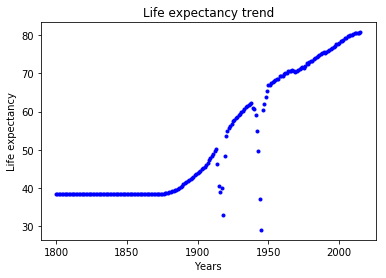

In [108]:
plt.plot('year', 'life_exp', 'b.', data=G_data)
plt.xlabel("Years")
plt.ylabel("Life expectancy")
plt.title('Life expectancy trend')

Here we again observe more or less linear growth, with large negative peacks on 1910s and especially 1940 which explained by the two world wars, where country participated. On 1940s Life expectancy dropped below 30 years!


Then we again plot the 3D graph to track dependence of GDP per capita and Life expectancy over time.

Text(0.5,0.92,'Dependence of GDP per capita on Life expectancy trend')

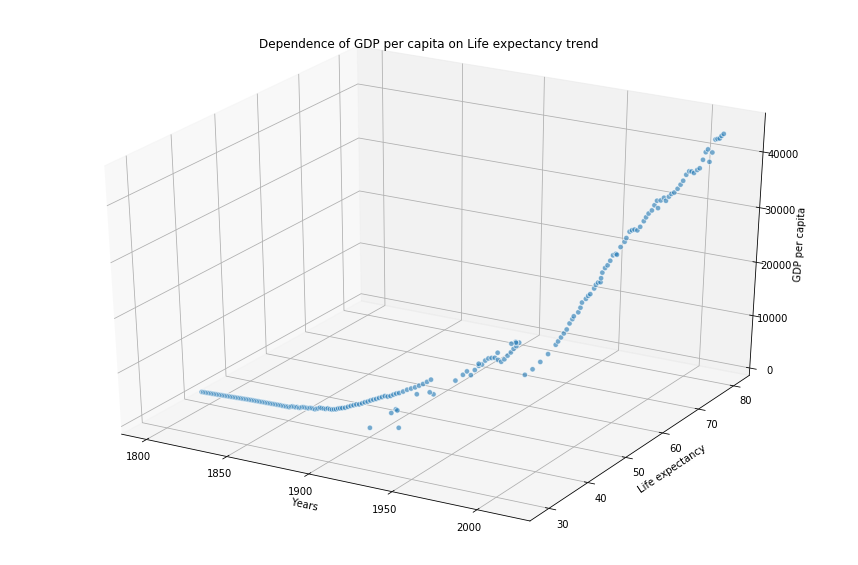

In [109]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = G_data['year']
ys = G_data['life_exp']
zs = G_data['gdp_per_cap']
ax.scatter(xs, ys, zs, s=30, alpha=0.6, edgecolors='w')

ax.set_xlabel('Years')
ax.set_ylabel('Life expectancy')
ax.set_zlabel('GDP per capita')


plt.title('Dependence of GDP per capita on Life expectancy trend')

Over time combination of life expectancy and GDP per capita show continious growth over time. Starting from 1930s the growht rate is much larger than before. Currently people in Germany live more than 80 years. 

<a id='conclusions'></a>
## Conclusions

### Results

Results of your analysed variables suggested:
1. There are increasing trend in all studied variables over the years: GDP per capita, Population, Schooling years and Life expectancy.
2. All variables were affected by the two worl wars, therefore there sharp drops in 1910s and 1940. Especially in the years of second worl war: the life expectancy was below 30 years!
3. Population in the las observed years has the fluctuating growth. 
4. There is convergence trend of men and women schooling years: average difference over the years wís more than 1 year of study, however in the las year of observation 2015 women in average study less than 0.4 year at school.
5. Combination of GDP and other variables over the years show the positive increasing trend.

Overall conclusion is the following: situation in the country becomes better over the years. Much faster growht observed of the studied variables after the second world war.

### Limitations

Our analysis have also some limitations:
1. Lack of data. Information about schooling years is only presented starting from 1970 (the oter variables from 1800)
2. The method, applied to fulfill missing variables for the population do not nececcasy represent the reality. In addition, we did not focus on some years with shocks: like war. We just applyed linear regression.
3. For the further analysis it would be interesting compare Germany with other countries.

